In [39]:
import pandas as pd

In [40]:
catalog.list()


[
    'stores',
    'calendar',
    'sales',
    'preprocessed_stores',
    'preprocessed_sales',
    'store_sales_weekly',
    'train_data',
    'test_data',
    'future_data',
    'forecast_model',
    'predictions',
    'parameters',
    'params:model_options',
    'params:model_options.split_date',
    'params:model_options.random_state',
    'params:model_options.n_estimators',
    'params:model_options.num_threads',
    'params:model_options.freqency',
    'params:model_options.horizon',
    'params:model_options.lags',
    'params:model_options.date_features',
    'params:model_options.static_features',
    'params:model_options.exogenous_features'
]

In [41]:
future_data = pd.DataFrame(catalog.load("future_data"))

[12/24/23 17:37:43] INFO     Loading data from future_data (ParquetDataset)...                  ]8;id=311540;file:///home/karl/miniconda3/envs/python_3.9_time/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=251673;file:///home/karl/miniconda3/envs/python_3.9_time/lib/python3.9/site-packages/kedro/io/data_catalog.py#482\482]8;;\

In [42]:
future_data

,unique_id,ds,IsHoliday,Temperature,Fuel_Price,Unemployment,CPI
2252,id_0,2009-05-03,0,33.012906,3.481951,7.511252,6.249922
2254,id_1,2009-05-03,0,33.012906,3.481951,7.511252,6.249922
2253,id_2,2009-05-03,0,33.012906,3.481951,7.511252,6.249922
2251,id_3,2009-05-03,0,33.012906,3.481951,7.511252,6.249922
2247,id_4,2009-05-03,0,33.012906,3.481951,7.511252,6.249922
...,...,...,...,...,...,...,...
2368,id_5,2009-07-26,0,24.281588,3.048330,4.224699,7.841467
2370,id_6,2009-07-26,0,24.281588,3.048330,4.224699,7.841467
2366,id_7,2009-07-26,0,24.281588,3.048330,4.224699,7.841467
2375,id_8,2009-07-26,0,24.281588,3.048330,4.224699,7.841467


In [43]:
model = catalog.load("forecast_model")
model

                    INFO     Loading data from forecast_model (PickleDataset)...                ]8;id=62366;file:///home/karl/miniconda3/envs/python_3.9_time/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=830310;file:///home/karl/miniconda3/envs/python_3.9_time/lib/python3.9/site-packages/kedro/io/data_catalog.py#482\482]8;;\

MLForecast(models=[XGBRegressor], freq=W, lag_features=['lag1', 'lag2', 'lag4', 'rolling_mean_lag1_window_size4', 'rolling_min_lag1_window_size4', 'rolling_max_lag1_window_size4'], date_features=['week', 'month'], num_threads=6)

In [44]:
# print(model.models["XGBRegressor"])

In [45]:
parameters = catalog.load("params:model_options")
parameters

[12/24/23 17:37:44] INFO     Loading data from params:model_options (MemoryDataset)...          ]8;id=630495;file:///home/karl/miniconda3/envs/python_3.9_time/lib/python3.9/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=44192;file:///home/karl/miniconda3/envs/python_3.9_time/lib/python3.9/site-packages/kedro/io/data_catalog.py#482\482]8;;\


{
    'split_date': '2009-05-03',
    'random_state': 0,
    'n_estimators': 100,
    'num_threads': 6,
    'freqency': 'W',
    'horizon': 4,
    'lags': [1, 2, 4],
    'date_features': ['week', 'month'],
    'static_features': ['Size', 'Type_A', 'Type_B'],
    'exogenous_features': ['IsHoliday', 'Temperature', 'Fuel_Price', 'Unemployment', 'CPI']
}

In [46]:
horizon = parameters["horizon"]
horizon

4

In [47]:
pred = model.predict(h=horizon, X_df=future_data)
pred = pred.sort_values(by=["ds", "unique_id"])
pred

,unique_id,ds,XGBRegressor
0,id_0,2009-05-03,0.268972
4,id_1,2009-05-03,0.198676
8,id_2,2009-05-03,0.241915
12,id_3,2009-05-03,0.278431
16,id_4,2009-05-03,0.308225
20,id_5,2009-05-03,0.205096
24,id_6,2009-05-03,0.368526
28,id_7,2009-05-03,0.292076
32,id_8,2009-05-03,0.215874
36,id_9,2009-05-03,0.243565


In [48]:
model.models_['XGBRegressor'].feature_importances_


array([0.03199649, 0.05210195, 0.        , 0.02663604, 0.05931845,
       0.06918723, 0.07351093, 0.07420854, 0.07224291, 0.0691741 ,
       0.07256066, 0.0802261 , 0.07867224, 0.07894932, 0.06844364,
       0.09277142], dtype=float32)

<Axes: title={'center': 'Feature Importance XGBRegressor'}>

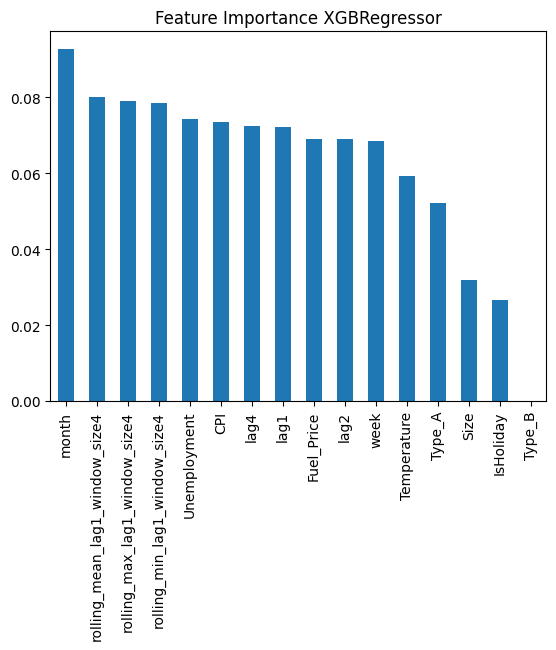

In [49]:
pd.Series(model.models_['XGBRegressor'].feature_importances_, index=model.ts.features_order_).sort_values(ascending=False).plot.bar(title='Feature Importance XGBRegressor')